In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

In [5]:
pa =  pd.read_csv(r"C:\Users\animesh\Documents\Property_Price_Train.csv")

In [6]:
pa.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
pa.tail()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RLD,68.0,9717,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
pa.shape

(1459, 81)

In [9]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [10]:
#pa.isnull().sum() / pa.shape[0] * 100

In [11]:
dro_cols = [ 'Pool_Quality' , 'Fence_Quality' , 'Miscellaneous_Feature' , 'Fireplace_Quality', 'Lane_Type']

In [12]:
pa1 = pa.drop([ 'Pool_Quality' , 'Fence_Quality' , 'Miscellaneous_Feature' , 'Fireplace_Quality', 'Lane_Type' ], axis = 1)

In [13]:
pa1.shape

(1459, 76)

In [14]:
pa1.isnull().sum()

Id                             0
Building_Class                 0
Zoning_Class                   0
Lot_Extent                   259
Lot_Size                       0
Road_Type                      0
Property_Shape                 0
Land_Outline                   0
Utility_Type                   0
Lot_Configuration              0
Property_Slope                 0
Neighborhood                   0
Condition1                     0
Condition2                     0
House_Type                     0
House_Design                   0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Roof_Design                    0
Roof_Quality                   0
Exterior1st                    0
Exterior2nd                    0
Brick_Veneer_Type              8
Brick_Veneer_Area              8
Exterior_Material              0
Exterior_Condition             0
Foundation_Type                0
Basement_Height               37
Basement_C

In [15]:
pa1.Lot_Extent.fillna(pa1.Lot_Extent.mean() , inplace = True)
pa1.Basement_Height.fillna("TA", inplace = True)
pa1.Exposure_Level.fillna("No" , inplace = True)
pa1.BsmtFinType1.fillna("Unf" , inplace = True)
pa1.BsmtFinType2.fillna("Unf" , inplace = True)
pa1.Garage.fillna("Attchd", inplace = True)
pa1.Garage_Built_Year.fillna(pa1.Garage_Built_Year.mean() , inplace = True)
pa1.Garage_Finish_Year.fillna("Unf" , inplace = True)
pa1.Garage_Quality.fillna("TA", inplace = True)
pa1.Garage_Condition.fillna("TA" , inplace = True)
pa1.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.mean() , inplace = True )
pa1.Basement_Condition.fillna("TA" , inplace = True)
pa1.Brick_Veneer_Type.fillna("None" , inplace = True)

In [16]:
pa1 = pa1.dropna()

In [17]:
#pa1.isnull().sum()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le  = LabelEncoder()

In [20]:
pa1[pa1.select_dtypes(include=['object']).columns]  = pa1[pa1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [21]:
pa1.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [22]:
pa1 = pa1.drop(["Id"] , axis  =1 )

In [23]:
#pa1.head(2)

In [24]:
pa1.shape

(1458, 75)

In [25]:
pa1_x = pa1.iloc[: , 0:74]
pa1_y = pa1.iloc[:, -1]

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
pa1_x_train , pa1_x_test , pa1_y_train , pa1_y_test = train_test_split(pa1_x  , pa1_y , test_size = .2)

In [28]:
print(pa1_x_train.shape), print(pa1_y_train.shape)
print("-----")
print(pa1_x_test.shape), print(pa1_y_test.shape)

(1166, 74)
(1166,)
-----
(292, 74)
(292,)


(None, None)

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [30]:
reg.fit(pa1_x_train, pa1_y_train);

In [31]:
pa_pred_train = reg.predict(pa1_x_train)
pa_pred_test = reg.predict(pa1_x_test)

In [32]:
Rsqaure = reg.score(pa1_x_train, pa1_y_train )
Rsqaure

0.8769769239046995

In [33]:
Rsqaure = reg.score(pa1_x_train, pa1_y_train )
K   = pa1_x_train.shape[1]
N   = pa1_x_train.shape[0]

Adj_Rsquae  = 1 -  (1- Rsqaure) *(N-1) / (N- K-1)
Adj_Rsquae

0.8686325539403986

In [34]:
reg.intercept_

1240763.4187175038

In [35]:
#reg.coef_

In [36]:
#pa1_x_train.columns

In [37]:
var_coef = pd.DataFrame({"Variable_Name" :pa1_x_train.columns , "Coef_Values" :reg.coef_})

In [38]:
var_coef

,Variable_Name,Coef_Values
0,Building_Class,-78.186671
1,Zoning_Class,-1691.715540
2,Lot_Extent,51.138456
3,Lot_Size,0.433043
4,Road_Type,31031.939933
5,Property_Shape,-512.241666
6,Land_Outline,2441.554990
7,Utility_Type,-40087.250306
8,Lot_Configuration,-402.523282
9,Property_Slope,5051.946699


In [39]:
#var_coef.sort_values( "Coef_Values")

In [40]:
error_train = pa1_y_train - pa_pred_train

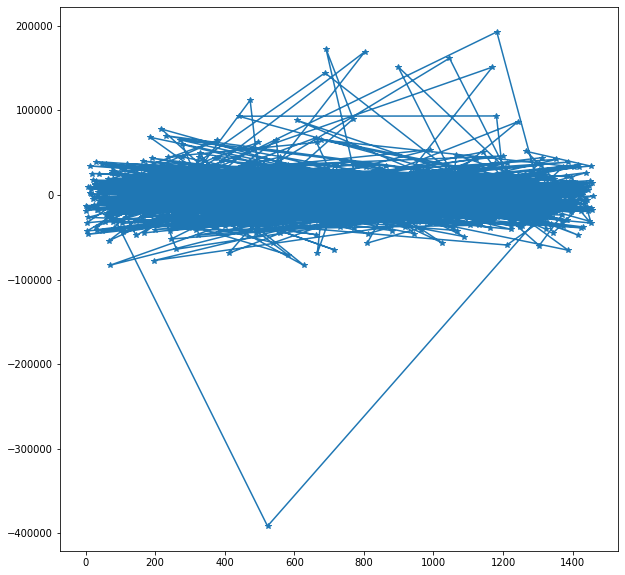

In [41]:
plt.figure(figsize = (10 , 10))
plt.plot(error_train , marker ='*')

In [42]:
np.mean(error_train)

1.4047715078087247e-10

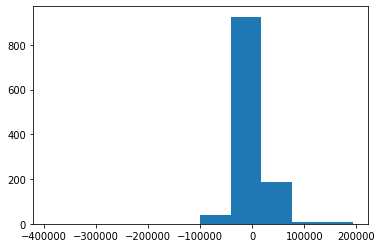

In [43]:
plt.hist(error_train, bins = 10);

In [44]:
import seaborn as sns

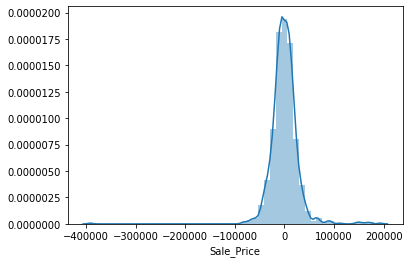

In [45]:
sns.distplot(error_train)

In [46]:
err_test = pa_pred_test - pa1_y_test

In [47]:
MAPE = np.mean(np.abs(err_test /pa1_y_test)) * 100
MAPE

12.772542769004941

In [48]:
MSE = np.mean(np.square(err_test))
MSE

2149635841.41283

In [49]:
RMSE  = np.sqrt(MSE)
RMSE

46364.16548815292